<a href="https://colab.research.google.com/github/munmeo1412/DL_learning_projects/blob/master/Clothes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0-rc1


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['Áo thun', 'Quần dài', 'Áo liền quần', 'Đầm', 'Áo khoác',
               'Sandal', 'Áo sơ mi', 'Giày', 'Túi xách', 'Ủng']

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_labels)

60000

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
len(test_labels)

10000

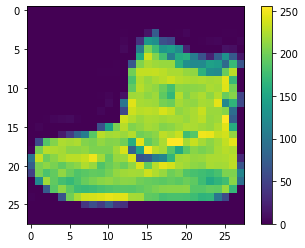

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

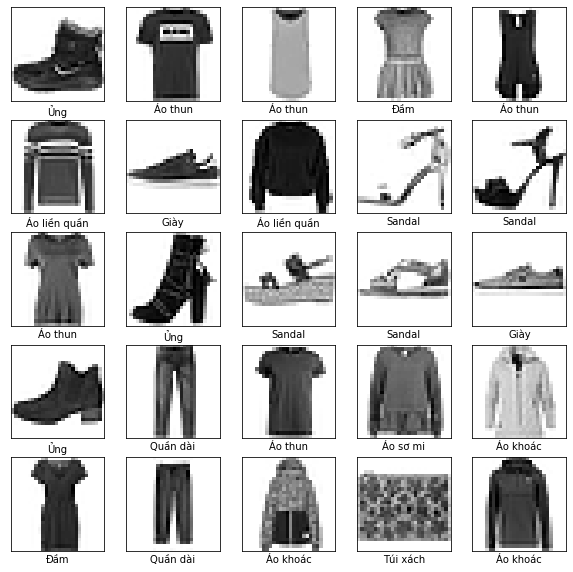

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.5049 - accuracy: 0.8234
Epoch 2/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3782 - accuracy: 0.8635
Epoch 3/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3401 - accuracy: 0.8760
Epoch 4/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.3147 - accuracy: 0.8846
Epoch 5/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2968 - accuracy: 0.8901
Epoch 6/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2828 - accuracy: 0.8940
Epoch 7/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2691 - accuracy: 0.9003
Epoch 8/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2585 - accuracy: 0.9041
Epoch 9/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2499 - accuracy: 0.9068
Epoch 10/10
60

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3609 - accuracy: 0.8722

Test accuracy: 0.8722


In [0]:
predictions = model.predict(test_images)

In [0]:
predictions[0]

array([3.6180300e-06, 1.3357125e-08, 1.1813387e-07, 1.0531306e-08,
       1.5449527e-07, 1.8736658e-03, 1.8880044e-05, 1.6774312e-02,
       2.9669850e-06, 9.8132634e-01], dtype=float32)

In [0]:
np.argmax(predictions[0])

9

In [0]:
test_labels[0]

9

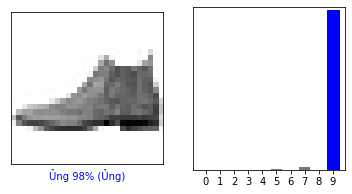

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#Chúng ta có thể nhìn vào ảnh 0th, các dự đoán, và mảng dự đoán. Nhãn dự đoán đúng màu xanh và nhãn sai màu đỏ. Con số là số phần trăm của các nhãn được dự đoán.

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

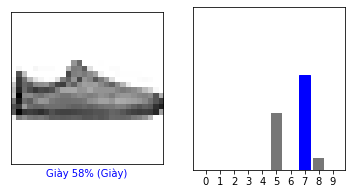

In [0]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

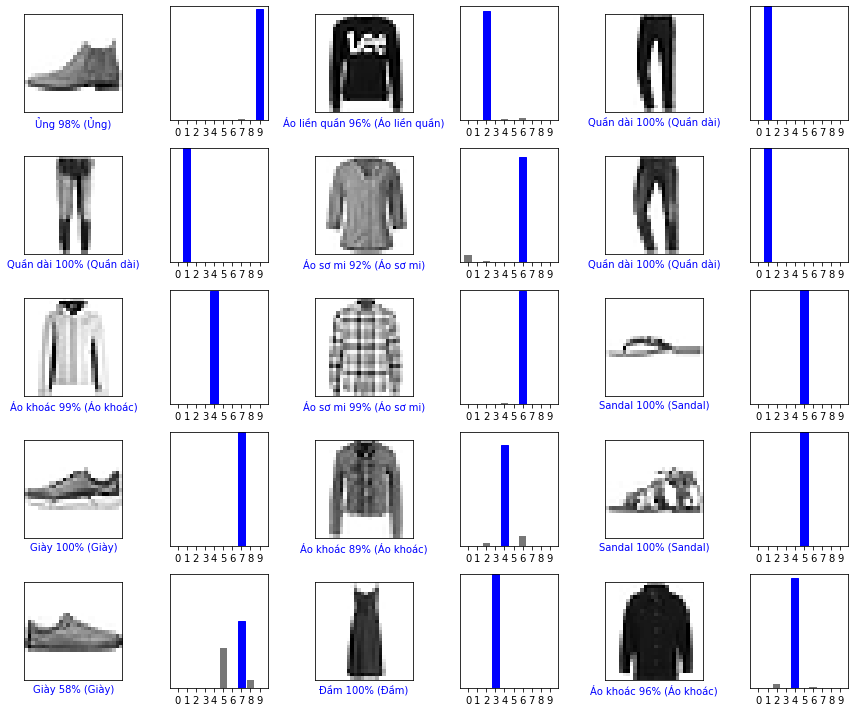

In [0]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [0]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [0]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [0]:
predictions_single = model.predict(img)

print(predictions_single)

[[5.16610235e-05 3.35959871e-11 9.61390495e-01 8.15087642e-09
  1.29093342e-02 1.33910446e-14 2.56485492e-02 8.17240309e-21
  2.03040570e-11 2.02285237e-11]]


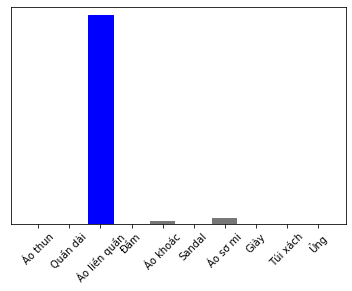

In [0]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [0]:
np.argmax(predictions_single[0])

2